In [2]:
#import libraries
import pandas as pd
import num
import lotlib.pyplot as plt
import lotlib.patches as patches
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score,roc_curve,roc_auc_score
from sklearn import metrics


In [3]:
read_file = pd.read_csv (r'/content/BP-MDD.txt')
read_file.to_csv (r'ved name.csv', index=None)

In [4]:
read_file

,0.056843,0.056034,0.056087,0.10826,0.067739,0.042298,0.10173,0.082679,0.066114,0.082551,...,0.062902,0.070859,0.099695,0.085014,0.10353,0.062956,0.068951,0.066857,0.078855,1
0,0.043384,0.067421,0.080000,0.082357,0.067969,0.046202,0.081793,0.093981,0.066849,0.084358,...,0.061850,0.068831,0.095510,0.064500,0.064815,0.058589,0.103060,0.059452,0.062202,1
1,0.041608,0.047949,0.079565,0.095533,0.075895,0.045371,0.058734,0.092157,0.078914,0.086527,...,0.066815,0.057044,0.100950,0.066990,0.077759,0.064037,0.123680,0.061762,0.065460,1
2,0.043108,0.040895,0.088175,0.061942,0.077486,0.054561,0.070293,0.099378,0.067504,0.096049,...,0.062421,0.061719,0.110120,0.065946,0.061221,0.057709,0.074477,0.066392,0.076199,1
3,0.032052,0.064807,0.095159,0.075693,0.091843,0.045781,0.052411,0.092720,0.074285,0.082294,...,0.066314,0.056200,0.093392,0.060312,0.072847,0.056664,0.075082,0.061823,0.060891,1
4,0.038326,0.051661,0.076422,0.069742,0.063791,0.037135,0.071507,0.092933,0.071394,0.077786,...,0.068092,0.063824,0.090633,0.076051,0.092445,0.055599,0.089684,0.058997,0.062982,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0.039334,0.039038,0.063290,0.069748,0.078538,0.049620,0.071981,0.101090,0.080842,0.084489,...,0.066731,0.063783,0.094780,0.066084,0.079840,0.063200,0.097518,0.058948,0.062585,2
137,0.035053,0.082281,0.093746,0.053249,0.058982,0.067863,0.087905,0.111840,0.067916,0.106890,...,0.063147,0.067529,0.111490,0.081081,0.081021,0.066966,0.105460,0.061842,0.066194,2
138,0.096909,0.067993,0.058444,0.063203,0.055530,0.049171,0.077054,0.168220,0.063023,0.116360,...,0.078490,0.067481,0.114340,0.085695,0.106790,0.074392,0.240020,0.087765,0.095459,2
139,0.039809,0.065715,0.065073,0.059256,0.072133,0.054797,0.058030,0.093569,0.072504,0.088011,...,0.072091,0.068698,0.117440,0.082197,0.073691,0.061511,0.094285,0.060423,0.066782,2


In [5]:
read_file.columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6','F7', 'F8', 'F9', 'F10', 'F11', 'F12','F13', 'F14', 'F15', 'F16', 'F17', 'F18','F19', 'F20', 'F21', 'F22', 'F23', 'F24','F25', 'F26', 'F27', 'F28', 'F29', 'F30','F31', 'F32', 'F33', 'F34', 'F35', 'F36','F37', 'F38', 'F39', 'F40', 'F41', 'F42','F43', 'F44', 'F45','F46']

In [6]:
read_file

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F37,F38,F39,F40,F41,F42,F43,F44,F45,F46
0,0.043384,0.067421,0.080000,0.082357,0.067969,0.046202,0.081793,0.093981,0.066849,0.084358,...,0.061850,0.068831,0.095510,0.064500,0.064815,0.058589,0.103060,0.059452,0.062202,1
1,0.041608,0.047949,0.079565,0.095533,0.075895,0.045371,0.058734,0.092157,0.078914,0.086527,...,0.066815,0.057044,0.100950,0.066990,0.077759,0.064037,0.123680,0.061762,0.065460,1
2,0.043108,0.040895,0.088175,0.061942,0.077486,0.054561,0.070293,0.099378,0.067504,0.096049,...,0.062421,0.061719,0.110120,0.065946,0.061221,0.057709,0.074477,0.066392,0.076199,1
3,0.032052,0.064807,0.095159,0.075693,0.091843,0.045781,0.052411,0.092720,0.074285,0.082294,...,0.066314,0.056200,0.093392,0.060312,0.072847,0.056664,0.075082,0.061823,0.060891,1
4,0.038326,0.051661,0.076422,0.069742,0.063791,0.037135,0.071507,0.092933,0.071394,0.077786,...,0.068092,0.063824,0.090633,0.076051,0.092445,0.055599,0.089684,0.058997,0.062982,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0.039334,0.039038,0.063290,0.069748,0.078538,0.049620,0.071981,0.101090,0.080842,0.084489,...,0.066731,0.063783,0.094780,0.066084,0.079840,0.063200,0.097518,0.058948,0.062585,2
137,0.035053,0.082281,0.093746,0.053249,0.058982,0.067863,0.087905,0.111840,0.067916,0.106890,...,0.063147,0.067529,0.111490,0.081081,0.081021,0.066966,0.105460,0.061842,0.066194,2
138,0.096909,0.067993,0.058444,0.063203,0.055530,0.049171,0.077054,0.168220,0.063023,0.116360,...,0.078490,0.067481,0.114340,0.085695,0.106790,0.074392,0.240020,0.087765,0.095459,2
139,0.039809,0.065715,0.065073,0.059256,0.072133,0.054797,0.058030,0.093569,0.072504,0.088011,...,0.072091,0.068698,0.117440,0.082197,0.073691,0.061511,0.094285,0.060423,0.066782,2


In [ ]:
#analysing data
read_file.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F37,F38,F39,F40,F41,F42,F43,F44,F45,F46
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.046357,0.059106,0.079638,0.079024,0.076153,0.047549,0.069257,0.092961,0.072454,0.092651,...,0.065926,0.065269,0.103794,0.074233,0.088992,0.061357,0.087961,0.067384,0.076523,1.503546
std,0.014777,0.022815,0.017629,0.016201,0.014096,0.013365,0.016515,0.018126,0.006756,0.013198,...,0.004516,0.007126,0.014964,0.013497,0.018440,0.004848,0.022673,0.011525,0.015467,0.501770
min,0.029569,0.034566,0.047161,0.051052,0.054176,0.032030,0.048371,0.062118,0.057388,0.029333,...,0.057150,0.054868,0.068403,0.057430,0.061221,0.054345,0.059002,0.055173,0.059056,1.000000
25%,0.037162,0.040895,0.068427,0.068153,0.065369,0.038330,0.059192,0.079202,0.068095,0.085038,...,0.062632,0.060935,0.094780,0.065199,0.077018,0.058264,0.071083,0.061803,0.066782,1.000000
50%,0.041523,0.052396,0.076097,0.076889,0.072574,0.044660,0.065013,0.091709,0.071887,0.090876,...,0.065546,0.064008,0.102580,0.071135,0.084748,0.060945,0.084587,0.064478,0.071989,2.000000
75%,0.051093,0.072547,0.087331,0.085900,0.083581,0.052662,0.074221,0.104090,0.076311,0.100460,...,0.068659,0.068208,0.112460,0.079265,0.096556,0.062825,0.098137,0.069489,0.081863,2.000000
max,0.126500,0.142700,0.154260,0.161210,0.137470,0.125560,0.175410,0.168220,0.095809,0.127620,...,0.081109,0.112360,0.195350,0.135340,0.213410,0.092409,0.240020,0.166510,0.181750,2.000000


In [ ]:
read_file.isnull().sum()

F1     0
F2     0
F3     0
F4     0
F5     0
F6     0
F7     0
F8     0
F9     0
F10    0
F11    0
F12    0
F13    0
F14    0
F15    0
F16    0
F17    0
F18    0
F19    0
F20    0
F21    0
F22    0
F23    0
F24    0
F25    0
F26    0
F27    0
F28    0
F29    0
F30    0
F31    0
F32    0
F33    0
F34    0
F35    0
F36    0
F37    0
F38    0
F39    0
F40    0
F41    0
F42    0
F43    0
F44    0
F45    0
F46    0
dtype: int64

In [ ]:
#building model using NAIVE BAYES ALGORITHM
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
nb_data=read_file.copy()
scores = []
ascore={}
f1score={}
sens={}
spec={}
prec={}
auc={}
nb_acc=[]
nb_f1=[]
nb_prec=[]
nb_spec=[]
nb_sens=[]
nb_auc=[]
nb_acc_s=[]
nb_f1_s=[]
nb_spec_s=[]
nb_sens_s=[]
nb_prec_s=[]
nb_auc_s=[]
j=0
y = nb_data['F46'].values
for i in range(45,0,-1):
 nb_data=nb_data.drop(nb_data.columns[i], axis=1)
 #print(read_file)
 x = nb_data.iloc[:,:i].values
 ascore[i]=[]
 f1score[i]=[]
 sens[i]=[]
 spec[i]=[]
 prec[i]=[]
 auc[i]=[]
 

 cv = KFold(n_splits=5, random_state=42, shuffle=True)
 for train_index, test_index in cv.split(x):
     #print("Train Index: ", train_index, "\n")
     #print("Test Index: ", test_index)
    
     X_train, X_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
   
     for j in range (1,101,1):
      classifier.fit(X_train, y_train)
      y_predict=classifier.predict(X_test)
      scores.append(classifier.score(X_test, y_test))
      probs = classifier.predict_proba(X_test)
      preds = probs[:,1]
      ascore[i].append(accuracy_score(y_test, y_predict))
      cm=confusion_matrix(y_test, y_predict)
      f1score[i].append(f1_score(y_test,y_predict,average='micro'))
      TP = cm[1][1]
      TN = cm[0][0]
      FP = cm[0][1]
      FN = cm[1][0]
      cf = (TP / float(TP + FN))
      sens[i].append(cf)
      cfy = (TN / float(TN + FP))
      spec[i].append(cfy)
      cfx = (TP / float(TP+FP))  
      prec[i].append(cfx)
      auc[i].append(roc_auc_score(y_test, preds, average='weighted'))
        
 average_acc=np.mean(ascore[i])
 average_f1score=np.mean(f1score[i])
 average_spec=np.mean(spec[i])
 average_sens=np.mean(sens[i])  
 average_prec=np.mean(prec[i])
 average_auc=np.mean(auc[i])
 

 nb_acc.append(average_acc)
 nb_f1.append(average_f1score)
 nb_sens.append(average_sens)
 nb_spec.append(average_spec)
 nb_prec.append(average_prec)   
 nb_auc.append(average_auc)
    
 average_s_acc=np.std(ascore[i])
 average_s_f1score=np.std(f1score[i])
 average_s_spec=np.std(spec[i])
 average_s_sens=np.std(sens[i])
 average_s_prec=np.std(prec[i])   
 average_s_auc=np.std(auc[i])

 nb_acc_s.append(average_s_acc)
 nb_f1_s.append(average_s_f1score)
 nb_sens_s.append(average_s_sens)
 nb_spec_s.append(average_s_spec)
 nb_prec_s.append(average_s_prec)
 nb_auc_s.append(average_s_auc)      

   
 #l=len(nb_acc)
 #m=len(nb_f1)
 #n=len(nb_sens)
 #o=len(nb_spec)
 #p=len(nb_auc)


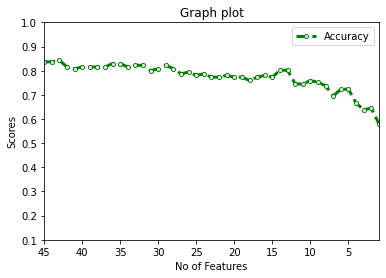

In [ ]:
#plotting for NAIVE BAYES
#line 1
x1 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y1 = nb_acc
# plotting the line 1 points
plt.plot(x1, y1, label = "Accuracy",color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='white', markersize=4)
plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()


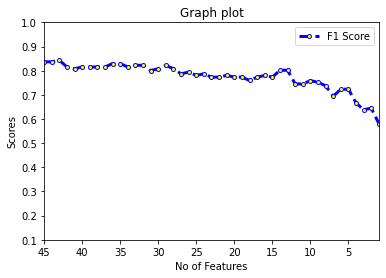

In [ ]:
#line 2 points
x2 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y3 = nb_f1
plt.plot(x1, y1, label = "F1 Score",color='blue', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='yellow', markersize=4)
plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
# show a legend on the plot
plt.legend()
# function to show the plot
plt.show()


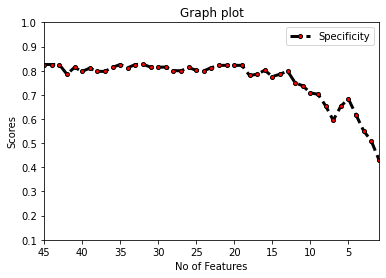

In [ ]:

#line 3 points
x3 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y3 = nb_spec
#plotting the line 3 points
plt.plot(x3, y3, label = "Specificity",color='black', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=4)
        
plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
# show a legend on the plot
plt.legend()
# function to show the plot
plt.show()

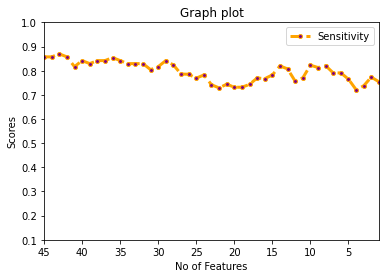

In [ ]:
#line 4 points
x4 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y4 = nb_sens
# plotting the line 4 points
plt.plot(x4, y4, label = "Sensitivity",color='orange', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='purple', markersize=4)
plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()


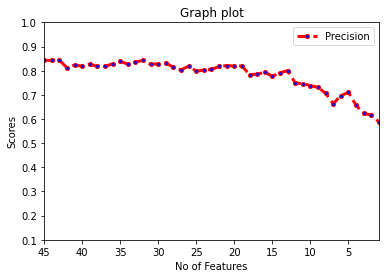

In [ ]:
#Line 5 points
x5 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y5 = nb_prec
# plotting the line 5 points
plt.plot(x5, y5, label = "Precision",color='red', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=4)

plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()


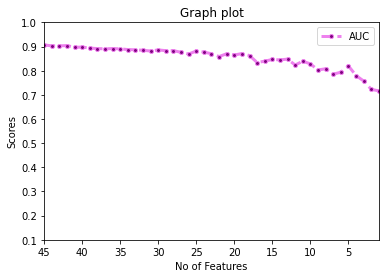

In [ ]:
x6 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y6 = nb_auc
# plotting the line 2 points
plt.plot(x6, y6, label = "AUC",color='violet', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='purple', markersize=4)

plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()


In [ ]:
#model using DescisionTree
from sklearn.tree import DecisionTreeClassifier
ppn = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
dt_data=read_file.copy()
scores = []
ascore={}
f1score={}
sens={}
spec={}
auc={}
prec={}
dt_acc=[]
dt_prec=[]
dt_f1=[]
dt_spec=[]
dt_sens=[]
dt_auc=[]
dt_acc_s=[]
dt_prec_s=[]
dt_f1_s=[]
dt_spec_s=[]
dt_sens_s=[]
dt_auc_s=[]
j=0
y = dt_data['F46'].values
for i in range(45,0,-1):
 dt_data=dt_data.drop(dt_data.columns[i], axis=1)
 x = dt_data.iloc[:,:i].values
 ascore[i]=[]
 f1score[i]=[]
 sens[i]=[]
 spec[i]=[]
 auc[i]=[]
 prec[i]=[]   

 cv = KFold(n_splits=5, random_state=42, shuffle=True)
 for train_index, test_index in cv.split(x):
     #print("Train Index: ", train_index, "\n")
     #print("Test Index: ", test_index)
    
     X_train, X_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
   
     for j in range (1,101,1):
      ppn.fit(X_train, y_train)
      y_predict=ppn.predict(X_test)
      scores.append(ppn.score(X_test, y_test))
      probs = ppn.predict_proba(X_test)
      preds = probs[:,1]
      ascore[i].append(accuracy_score(y_test, y_predict))
      cm=confusion_matrix(y_test, y_predict)
      f1score[i].append(f1_score(y_test,y_predict,average='micro'))
      TP = cm[1][1]
      TN = cm[0][0]
      FP = cm[0][1]
      FN = cm[1][0]
      cf = (TP / float(TP + FN))
      sens[i].append(cf)
      cfy = (TN / float(TN + FP))
      spec[i].append(cfy)
      cfx = (TP / float(TP + FP))
      prec[i].append(cfx)  
      auc[i].append(roc_auc_score(y_test, preds, average='weighted'))
     
 average_acc=np.mean(ascore[i])
 average_f1score=np.mean(f1score[i])
 average_spec=np.mean(spec[i])
 average_sens=np.mean(sens[i])
 average_prec=np.mean(prec[i])   
 average_auc=np.mean(auc[i])
 dt_acc.append(average_acc)
 dt_f1.append(average_f1score)
 dt_sens.append(average_sens)
 dt_spec.append(average_spec)
 dt_prec.append(average_prec)
 dt_auc.append(average_auc)
    
 average_s_acc=np.std(ascore[i])
 average_s_f1score=np.std(f1score[i])
 average_s_spec=np.std(spec[i])
 average_s_sens=np.std(sens[i])
 average_s_prec=np.std(prec[i])   
 average_s_auc=np.std(auc[i])
 dt_acc_s.append(average_s_acc)
 dt_f1_s.append(average_s_f1score)
 dt_sens_s.append(average_s_sens)
 dt_spec_s.append(average_s_spec)
 dt_prec_s.append(average_s_prec)
 dt_auc_s.append(average_s_auc)   


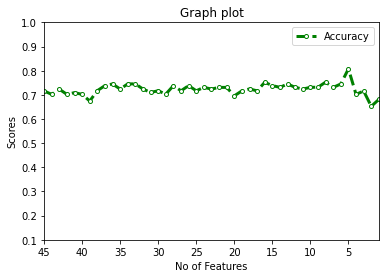

In [ ]:
#plotting for DESCION TREE
x1 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y1 = dt_acc
# plotting the line 1 points
plt.plot(x1, y1, label = "Accuracy",color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='white', markersize=4)
plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()


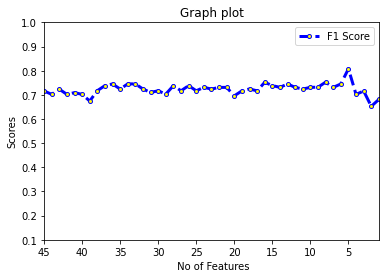

In [ ]:
#line 2 points
x2 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y2 = dt_f1
plt.plot(x2, y2, label = "F1 Score",color='blue', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='yellow', markersize=4)

plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel(' No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()


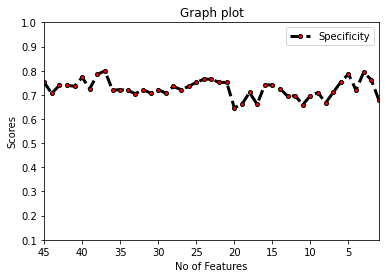

In [ ]:
#line 3 points
x3 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y3 = dt_spec
#plotting the line 3 points
plt.plot(x3, y3, label = "Specificity",color='black', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=4)

plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()


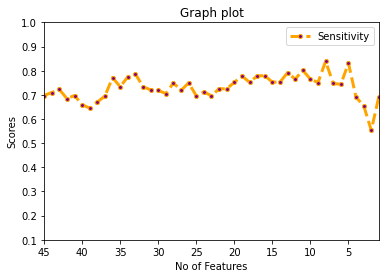

In [ ]:
#line 4 points
x4 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y4 = dt_sens
# plotting the line 4 points
plt.plot(x4, y4, label = "Sensitivity",color='orange', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='purple', markersize=4)
plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

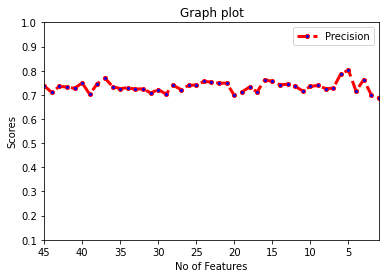

In [ ]:
# Line 5 points
x5 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y5 = dt_prec
# plotting the line 5 points
plt.plot(x5, y5, label = "Precision",color='red', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=4)


plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

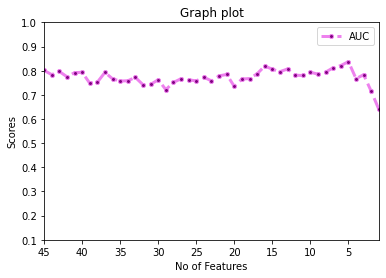

In [ ]:

#line 6 points
x6 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y6 = dt_auc
# plotting the line 2 points
plt.plot(x6, y6, label = "AUC",color='violet', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='purple', markersize=4)

plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

In [ ]:
#MODEL USING RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=1, random_state=0)
rf_data=read_file.copy()
scores = []
ascore={}
f1score={}
sens={}
spec={}
prec={}
auc={}
rf_acc=[]
rf_f1=[]
rf_spec=[]
rf_sens=[]
rf_prec=[]
rf_auc=[]
rf_acc_s=[]
rf_f1_s=[]
rf_spec_s=[]
rf_sens_s=[]
rf_prec_s=[]
rf_auc_s=[]
j=0
y = read_file['F46'].values
for i in range(45,0,-1):
 rf_data=rf_data.drop(rf_data.columns[i], axis=1)
 #print(read_file)
 x = rf_data.iloc[:,:i].values
 ascore[i]=[]
 f1score[i]=[]
 sens[i]=[]
 spec[i]=[]
 prec[i]=[]
 auc[i]=[]

 cv = KFold(n_splits=5, random_state=42, shuffle=True)
 for train_index, test_index in cv.split(x):
     #print("Train Index: ", train_index, "\n")
     #print("Test Index: ", test_index)
    
     X_train, X_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
   
     for j in range (1,5,1):
      clf.fit(X_train, y_train)
      y_predict=clf.predict(X_test)
      scores.append(clf.score(X_test, y_test))
      probs = clf.predict_proba(X_test)
      preds = probs[:,1]
      ascore[i].append(accuracy_score(y_test, y_predict))
      cm=confusion_matrix(y_test, y_predict)
      f1score[i].append(f1_score(y_test,y_predict,average='micro'))
      TP = cm[1][1]
      TN = cm[0][0]
      FP = cm[0][1]
      FN = cm[1][0]
      cf = (TP / float(TP + FN))
      sens[i].append(cf)
      cfy = (TN / float(TN + FP))
      spec[i].append(cfy)
      cfx = (TP / float(TP + FP))
      prec[i].append(cfx)  
      auc[i].append(roc_auc_score(y_test, preds, average='weighted'))
     
 average_acc=np.mean(ascore[i])
 average_f1score=np.mean(f1score[i])
 average_spec=np.mean(spec[i])
 average_sens=np.mean(sens[i])
 average_prec=np.mean(prec[i])   
 average_auc=np.mean(auc[i])
 rf_acc.append(average_acc)
 rf_f1.append(average_f1score)
 rf_sens.append(average_sens)
 rf_spec.append(average_spec)
 rf_prec.append(average_prec)
 rf_auc.append(average_auc)
 average_s_acc=np.std(ascore[i])
 average_s_f1score=np.std(f1score[i])
 average_s_spec=np.std(spec[i])
 average_s_sens=np.std(sens[i])
 average_s_prec=np.std(prec[i])   
 average_s_auc=np.std(auc[i])  
 rf_acc_s.append(average_s_acc)
 rf_f1_s.append(average_s_f1score)
 rf_sens_s.append(average_s_sens)
 rf_spec_s.append(average_s_spec)
 rf_prec_s.append(average_s_prec)
 rf_auc_s.append(average_s_auc)   

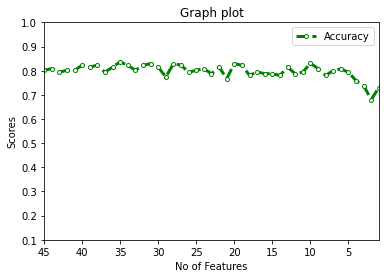

In [ ]:
#plotting for RANDOM FOREST
x1 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y1 = rf_acc
# plotting the line 1 points
plt.plot(x1, y1, label = "Accuracy",color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='white', markersize=4)
plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

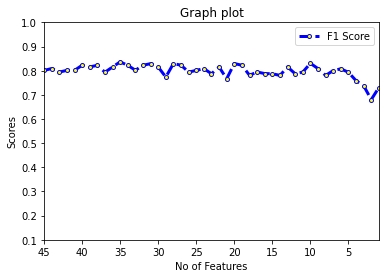

In [ ]:
#line 2 points
x2 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y2 = rf_f1
plt.plot(x2, y2, label = "F1 Score",color='blue', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='yellow', markersize=4)
plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

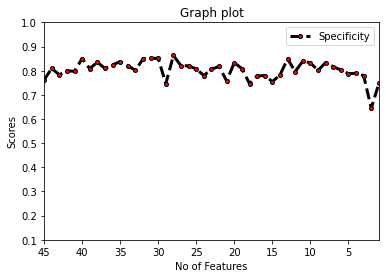

In [ ]:
#line 3 points
x3 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y3 = rf_spec
#plotting the line 3 points
plt.plot(x3, y3, label = "Specificity",color='black', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=4)
plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

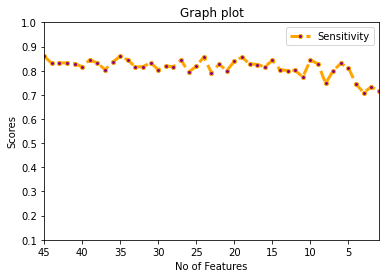

In [ ]:
#line 4 points
x4 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y4 = rf_sens
# plotting the line 4 points
plt.plot(x4, y4, label = "Sensitivity",color='orange', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='purple', markersize=4)
plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

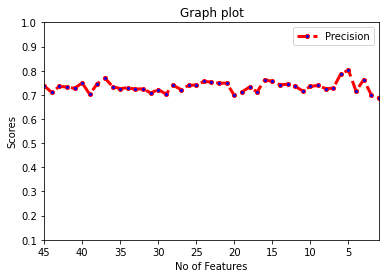

In [ ]:
# Line 5 points
x5 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y5 = dt_prec
# plotting the line 5 points
plt.plot(x5, y5, label = "Precision",color='red', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=4)

plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

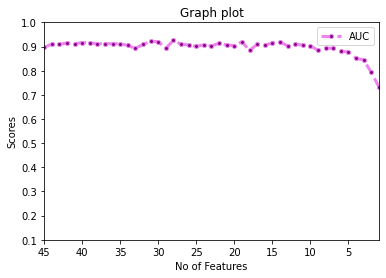

In [ ]:
#line 6 points
x6 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y6 = rf_auc
# plotting the line 2 points
plt.plot(x6, y6, label = "AUC",color='violet', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='purple', markersize=4)
plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

In [ ]:
#MODEL USING LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda_data=read_file.copy()
scores = []
ascore={}
f1score={}
sens={}
spec={}
prec={}
auc={}
lda_acc=[]
lda_f1=[]
lda_spec=[]
lda_sens=[]
lda_prec=[]
lda_auc=[]
lda_acc_s=[]
lda_f1_s=[]
lda_spec_s=[]
lda_sens_s=[]
lda_prec_s=[]
lda_auc_s=[]
j=0
y = lda_data['F46'].values
for i in range(45,0,-1):
 lda_data=lda_data.drop(lda_data.columns[i], axis=1)
 #print(read_file)
 x = lda_data.iloc[:,:i].values
 ascore[i]=[]
 f1score[i]=[]
 sens[i]=[]
 spec[i]=[]
 prec[i]=[]
 auc[i]=[]

 cv = KFold(n_splits=5, random_state=42, shuffle=True)
 
 for train_index, test_index in cv.split(x):
     #print("Train Index: ", train_index, "\n")
     #print("Test Index: ", test_index)
    
     X_train, X_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
   
     for j in range (1,101,1):
      lda.fit(X_train, y_train)
      y_predict=lda.predict(X_test)
      scores.append(lda.score(X_test, y_test))
      probs = lda.predict_proba(X_test)
      preds = probs[:,1]
      ascore[i].append(accuracy_score(y_test, y_predict))
      cm=confusion_matrix(y_test, y_predict)
      f1score[i].append(f1_score(y_test,y_predict,average='micro'))
      TP = cm[1][1]
      TN = cm[0][0]
      FP = cm[0][1]
      FN = cm[1][0]
      cf = (TP / float(TP + FN))
      sens[i].append(cf)
      cfy = (TN / float(TN + FP))
      spec[i].append(cfy)
      cfx = (TP / float(TP+FP))  
      prec[i].append(cfx)
      auc[i].append(roc_auc_score(y_test, preds, average='weighted'))
     
 average_acc=np.mean(ascore[i])
 average_f1score=np.mean(f1score[i])
 average_spec=np.mean(spec[i])
 average_sens=np.mean(sens[i])
 average_prec=np.mean(prec[i])   
 average_auc=np.mean(auc[i])
 lda_acc.append(average_acc)
 lda_f1.append(average_f1score)
 lda_sens.append(average_sens)
 lda_spec.append(average_spec)
 lda_prec.append(average_prec)
 lda_auc.append(average_auc)
 average_s_acc=np.std(ascore[i])
 average_s_f1score=np.std(f1score[i])
 average_s_spec=np.std(spec[i])
 average_s_sens=np.std(sens[i])
 average_s_prec=np.std(prec[i])   
 average_s_auc=np.std(auc[i])
 lda_acc_s.append(average_s_acc)
 lda_f1_s.append(average_s_f1score)
 lda_sens_s.append(average_s_sens)
 lda_spec_s.append(average_s_spec)
 lda_prec_s.append(average_s_prec)
 lda_auc_s.append(average_s_auc)    

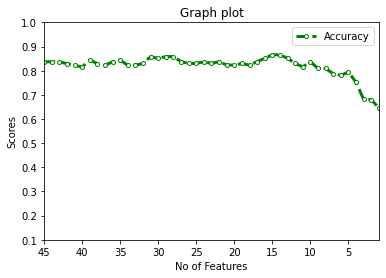

In [ ]:
#plotting for LDA
x1 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y1 = lda_acc
# plotting the line 1 points
plt.plot(x1, y1, label = "Accuracy",color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='white', markersize=4)
plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

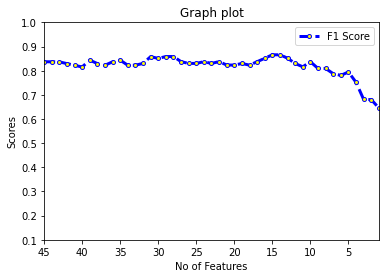

In [ ]:
#line 2 points
x2 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y2 = lda_f1
plt.plot(x2, y2, label = "F1 Score",color='blue', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='yellow', markersize=4)
plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()



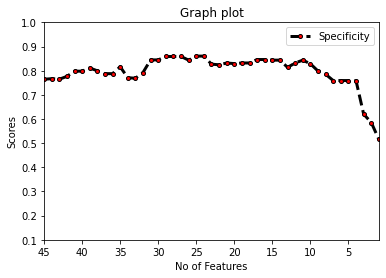

In [ ]:
#line 3 points
x3 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y3 = lda_spec
#plotting the line 3 points
plt.plot(x3, y3, label = "Specificity",color='black', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=4)
plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()



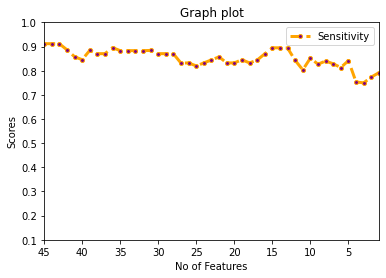

In [ ]:
#line 4 points
x4 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y4 = lda_sens
# plotting the line 4 points
plt.plot(x4, y4, label = "Sensitivity",color='orange', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='purple', markersize=4)
plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()



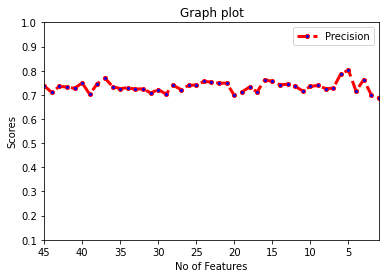

In [ ]:
# Line 5 points
x5 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y5 = dt_prec
# plotting the line 5 points
plt.plot(x5, y5, label = "Precision",color='red', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=4)

plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()



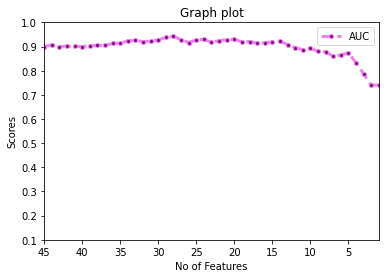

In [ ]:
#Line 6 points
x6 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y6 = lda_auc
# plotting the line 6 points
plt.plot(x6, y6, label = "AUC",color='violet', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='purple', markersize=4)

plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

In [ ]:
#MODEL USING QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda_data=read_file.copy()
scores = []
ascore={}
f1score={}
sens={}
spec={}
prec={}
auc={}
qda_acc=[]
qda_f1=[]
qda_spec=[]
qda_sens=[]
qda_prec=[]
qda_auc=[]
qda_acc_s=[]
qda_f1_s=[]
qda_spec_s=[]
qda_sens_s=[]
qda_prec_s=[]
qda_auc_s=[]

j=0
y = qda_data['F46'].values
for i in range(45,0,-1):
 qda_data=qda_data.drop(qda_data.columns[i], axis=1)
 #print(read_file)
 x = qda_data.iloc[:,:i].values
 ascore[i]=[]
 f1score[i]=[]
 sens[i]=[]
 spec[i]=[]
 prec[i]=[]
 auc[i]=[]

 cv = KFold(n_splits=5, random_state=42, shuffle=True)
 for train_index, test_index in cv.split(x):
     #print("Train Index: ", train_index, "\n")
     #print("Test Index: ", test_index)
    
     X_train, X_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]
   
     for j in range (1,101,1):
      qda.fit(X_train, y_train)
      y_predict=qda.predict(X_test)
      scores.append(qda.score(X_test, y_test))
      probs = qda.predict_proba(X_test)
      preds = probs[:,1]
      ascore[i].append(accuracy_score(y_test, y_predict))
      cm=confusion_matrix(y_test, y_predict)
      f1score[i].append(f1_score(y_test,y_predict,average='micro'))
      TP = cm[1][1]
      TN = cm[0][0]
      FP = cm[0][1]
      FN = cm[1][0]
      cf = (TP / float(TP + FN))
      sens[i].append(cf)
      cfy = (TN / float(TN + FP))
      spec[i].append(cfy)
      cfx = (TP / float(TP+FP)) 
      prec[i].append(cfx) 
      auc[i].append(roc_auc_score(y_test, preds, average='weighted'))
     
 average_acc=np.mean(ascore[i])
 average_f1score=np.mean(f1score[i])
 average_spec=np.mean(spec[i])
 average_sens=np.mean(sens[i])
 avarage_spec=np.mean(prec[i])   
 average_auc=np.mean(auc[i])
 qda_acc.append(average_acc)
 qda_f1.append(average_f1score)
 qda_sens.append(average_sens)
 qda_spec.append(average_spec)
 qda_prec.append(average_prec)   
 qda_auc.append(average_auc)
 average_s_acc=np.std(ascore[i])
 average_s_f1score=np.std(f1score[i])
 average_s_spec=np.std(spec[i])
 average_s_sens=np.std(sens[i])
 average_s_prec=np.std(prec[i])   
 average_s_auc=np.std(auc[i])
 qda_acc_s.append(average_s_acc)
 qda_f1_s.append(average_s_f1score)
 qda_sens_s.append(average_s_sens)
 qda_spec_s.append(average_s_spec)
 qda_prec_s.append(average_s_prec)
 qda_auc_s.append(average_s_auc)    

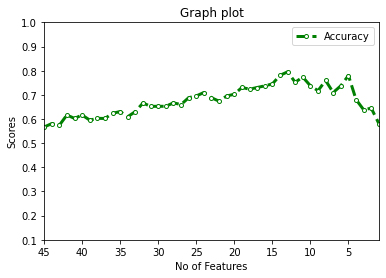

In [ ]:
#plotting for QDA
#Line 1 points
x1 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y1 = qda_acc
# plotting the line 1 points
plt.plot(x1, y1, label = "Accuracy",color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='white', markersize=4)
plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

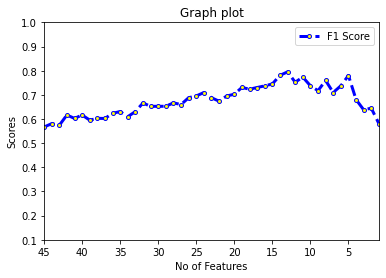

In [ ]:
#line 2 points
x2 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y2 = qda_f1
plt.plot(x2, y2, label = "F1 Score",color='blue', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='yellow', markersize=4)
plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

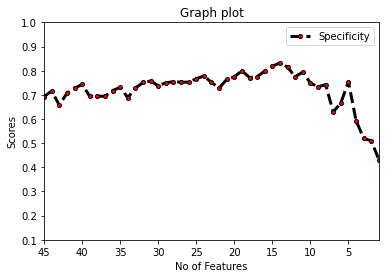

In [ ]:
#line 3 points
x3 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y3 = qda_spec
#plotting the line 3 points
plt.plot(x3, y3, label = "Specificity",color='black', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=4)
plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

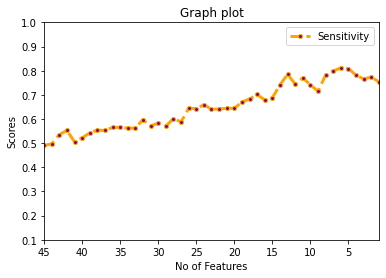

In [ ]:
#line 4 points
x4 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y4 = qda_sens
# plotting the line 4 points
plt.plot(x4, y4, label = "Sensitivity",color='orange', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='purple', markersize=4)
plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

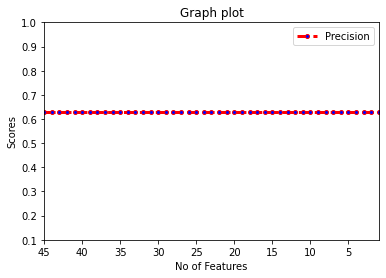

In [ ]:
# Line 5 points
x5 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y5 = qda_prec
# plotting the line 5 points
plt.plot(x5, y5, label = "Precision",color='red', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=4)
plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

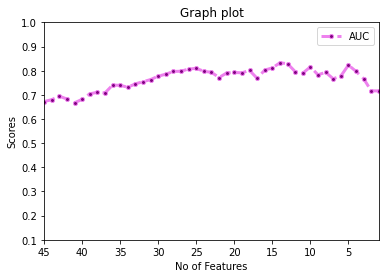

In [ ]:
#Line 6 points
x6 = [45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]
y6 = qda_auc
# plotting the line 6 points
plt.plot(x6, y6, label = "AUC",color='violet', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='purple', markersize=4)

plt.ylim(0.1,1)
plt.xlim(45,1)
# naming the x axis
plt.xlabel('No of Features')
# naming the y axis
plt.ylabel('Scores')
# giving a title to my graph
plt.title('Graph plot')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

In [ ]:
#TABLE 
#NAIVE BAYES
nb_max_acc=np.max(nb_acc)
NB=nb_acc.index(nb_max_acc)


#DESCION TREE
dt_max_acc=np.max(dt_acc)
DT=dt_acc.index(dt_max_acc)


#RANDOM FOREST
rf_max_acc=np.max(rf_acc)
RF=rf_acc.index(rf_max_acc)

#LDA
lda_max_acc=np.max(lda_acc)
LDA=lda_acc.index(lda_max_acc)

#QDA
qda_max_acc=np.max(qda_acc)
QDA=qda_acc.index(qda_max_acc)



In [ ]:
import pandas as pd  
    
data = {'Naive Bayes':[nb_max_acc,45-NB, nb_f1[NB], nb_sens[NB], nb_spec[NB],nb_prec[NB], nb_auc[NB]],'Random Forest':[rf_max_acc,45-RF, rf_f1[RF], rf_sens[RF], rf_spec[RF],rf_prec[RF],rf_auc[RF]],  'Descion Tree':[dt_max_acc, 45-DT, dt_f1[DT], dt_sens[DT], dt_spec[DT],dt_prec[DT],dt_auc[DT]],'LDA':[lda_max_acc, 45-LDA, lda_f1[LDA], lda_sens[LDA], lda_spec[LDA],lda_prec[LDA],lda_auc[LDA]],'QDA':[qda_max_acc, 45-QDA, qda_f1[QDA], qda_sens[QDA], qda_spec[QDA],qda_prec[QDA],qda_auc[QDA]]}  
  
# Creates pandas DataFrame.  
df = pd.DataFrame(data, index =['Accuracy', 'Number of Features', 'F1 score', 'Sensitivity','Specificity','Precision','AUC'])  
print(df)  

                    Naive Bayes  Random Forest  Descion Tree        LDA  \
Accuracy               0.843842       0.836453      0.807635   0.865764   
Number of Features    43.000000      35.000000      5.000000  15.000000   
F1 score               0.843842       0.836453      0.807635   0.865764   
Sensitivity            0.869615       0.860000      0.831200   0.894615   
Specificity            0.825518       0.837843      0.786275   0.843613   
Precision              0.844017       0.846485      0.802236   0.853937   
AUC                    0.902735       0.911813      0.837496   0.918334   

                          QDA  
Accuracy             0.795074  
Number of Features  13.000000  
F1 score             0.795074  
Sensitivity          0.784382  
Specificity          0.814230  
Precision            0.628526  
AUC                  0.828754  
